In [1]:
from tensorflow.keras import layers , datasets , models
import tensorflow
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

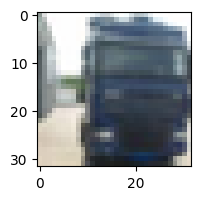

In [4]:
plt.figure(figsize=(15,2))
plt.imshow(x_train[657])

In [5]:
x_train=x_train/255
x_test=x_test/255

In [6]:
x_train[:5]

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train=y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_test=y_test.reshape(-1)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [10]:
from tensorflow import keras

In [11]:
#now using cnn on the same dataset 
cnn = models.Sequential([
    layers.Conv2D(32, (3,3), padding="same", activation="relu", input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3,3), padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(10, activation="softmax")
])


/opt/anaconda3/envs/tf_env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-02-07 07:43:55.258234: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2026-02-07 07:43:55.258262: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2026-02-07 07:43:55.258269: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2026-02-07 07:43:55.258292: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2026-02-07 07:43:55.258305: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.c

In [12]:
optimizer = keras.optimizers.Adam(learning_rate=0.0005)

cnn.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)



In [13]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)


In [14]:
history = cnn.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=10,
    validation_data=(x_test, y_test)
)


Epoch 1/10


/opt/anaconda3/envs/tf_env/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2026-02-07 07:43:56.902673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 62ms/step - accuracy: 0.3732 - loss: 1.9144 - val_accuracy: 0.4215 - val_loss: 1.7477
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 58ms/step - accuracy: 0.5143 - loss: 1.3628 - val_accuracy: 0.5894 - val_loss: 1.1872
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.5831 - loss: 1.1688 - val_accuracy: 0.6472 - val_loss: 1.0245
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.6252 - loss: 1.0614 - val_accuracy: 0.6423 - val_loss: 1.0396
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 63ms/step - accuracy: 0.6511 - loss: 0.9904 - val_accuracy: 0.6658 - val_loss: 0.9878
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.6740 - loss: 0.9295 - val_accuracy: 0.6990 - val_loss: 0.8887
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 80ms/step - accuracy: 0.6882 - loss: 0.8848 - val_accuracy: 0.6738 - val_loss: 0.9513
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.7065 - loss: 0.8426 - val_accurac

In [15]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7304 - loss: 0.8039


[0.8038514256477356, 0.730400025844574]